In [26]:
import numpy as np
import matplotlib.pyplot as plt

from funcs.geometry import rotate_around_arb_axis

# set dark background
plt.style.use('dark_background')


In [27]:
Rstar = 1

latitude = np.pi/2 - 60 / 180 * np.pi

i_rot = np.pi/2 - 70 / 180 * np.pi

i_mag = 10 / 180 * np.pi


# 3D rotation matrix for rotation around y axis with the i_rot + i_mag angle
Rrotmag = np.array([[np.cos(i_rot + i_mag), 0, np.sin(i_rot + i_mag)],
            [0, 1, 0],
            [-np.sin(i_rot + i_mag), 0, np.cos(i_rot + i_mag)]])

# 3D rotation matrix for rotation around y axis with the i_rot angle
Rrot = np.array([[np.cos(i_rot), 0, np.sin(i_rot)],
            [0, 1, 0],
            [-np.sin(i_rot), 0, np.cos(i_rot)]])

# rotate the z axis with Rrot
z_rot = np.array([0, 0, 1])
z_rot = np.dot(Rrot, z_rot)

def ring_element(phi, theta, r):
    st, ct = np.sin(theta), np.cos(theta)
    sp, cp = np.sin(phi), np.cos(phi)
    return r * np.array([st * sp, st * cp, ct])




# rotate the points on the sphere
x, y, z = np.dot(Rrotmag, ring_element(phi, latitude, Rstar))

# rotate the points on the sphere
newxyz = rotate_around_arb_axis(angle, np.aaray([x,y,z]), z_rot)



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

Text(0.5, 0, '$v_x$ of that element')

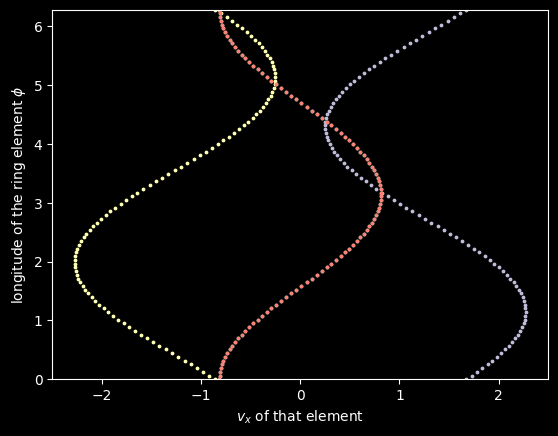

In [32]:
def vx(phi, alpha, i_rot, i_mag, latitude):
    sa, ca = np.sin(alpha), np.cos(alpha)
    si, ci = np.sin(i_rot), np.cos(i_rot)
    st, ct = np.sin(latitude), np.cos(latitude)
    sp, cp = np.sin(phi), np.cos(phi)
    sip, cip = np.sin(i_rot + i_mag), np.cos(i_rot + i_mag)

    X = -sa * sip * ct + 2 * ca * sa * ci * ci * (sip + cip)
    Y = -sa * cip * st + 2 * ca * sa * st * (cip - sip)
    Z = -ca * ci * st

    return X + sp * Y + cp * Z


phi = np.linspace(0, 2 * np.pi, 100)

for alphas in np.linspace(0, np.pi*2, 4):
    plt.scatter(vx(phi, alphas, i_rot, i_mag, 60 / 180 * np.pi), phi, s=3)

plt.ylim(0, 2 * np.pi)
plt.ylabel(r'longitude of the ring element $\phi$')
plt.xlabel(r'$v_x$ of that element')


